### A proper tutorial on electrons and photons in CMS should focus on:

### Reconstruction, Identification, and Energy correction

#### at 

## High level trigger (HLT) and Offline (prompt-reco / re-reco)


## We ofcourse have only two hours, so we can only try to give you a flavour of most of it.

### For a pretty full fledged tutorial, please follow the last E/Gamma tutorial here:
https://indico.cern.ch/event/1259025/


# ----------------------------------------------------------------------------------

# Coordinate System

<img src="https://tikz.net/wp-content/uploads/2021/09/axis3D_CMS-002.png" alt="Alt Text" width="600" height="300">

<img src="https://www.lhc-closer.es/webapp/files/1435504163_ad6fd1cc4163a3a2d3c54388c80c45ba.jpg" alt="Alt Text" width="300" height="150">

# Interactions

<img src="Pics/HOW_eg_interact.PNG" alt="Alt Text" width="600">

# ----------------------------------------------------------------------------------

# Where to find electrons and photons in the the CMS detector 

<img src="https://cmsexperiment.web.cern.ch/sites/cmsexperiment.web.cern.ch/files/detectoroverview.gif" alt="Alt Text" width="600" height="300">

## ECAL
<img src="https://i.stack.imgur.com/wlXQV.jpg" alt="Alt Text" width="600" height="300">

## Tracker
<img src="https://twiki.cern.ch/twiki/pub/CMSPublic/DPGResultsTRK/Phase1_Tracker_1Quarter.png" alt="Alt Text" width="600" height="300">




<img src="https://cms.cern/sites/default/files/inline-images/brem.gif" alt="Alt Text" width="600">

A full schematic of reconstruction:
<img src="Pics/ECAL1.png" alt="Alt Text" width="600" height="450">
<img src="Pics/reco.PNG" alt="Alt Text" width="600" height="450">



# ----------------------------------------------------------------------------------


# Simplified aspects of e/gamma reconstruction

### Electrons deposit their energy in the ECAL (see in the gif above)

When electrons (and also photons) pass through the ECAL crystals, they create a kind of energy explosion called an electromagnetic shower. The ECAL consists of a grid of individual detectors (Lead Tungstate crystals), which are sensitive to the energy deposited by particles. Each detector is capable of measuring the energy deposited within its volume.

Now comes the tricky part. We take all energy measurements from the detectors and use a "fancy" algorithm to group together the energy deposits that are close to each other. We are basically trying to figure out which deposits came from the same particle.

Each cluster represents the energy left behind by one particle. The cluster's properties are then the particle's approximated properties.


### ECAL-EGamma interplay
https://indico.cern.ch/event/1259025/#43-ecal-egamma-interplay


## Thresholds and noise


ECAL isn't immune to noise that can mess up its performance and accuracy. This noise, known as detector noise, comes from a few different sources. Some of them are:

    Electronic Noise: This noise comes from the electronics that read the signals from the ECAL. It's caused by things like temperature fluctuations, not-so-perfect amplification, or electrical interference.

    Dark Current: Even when there's no light hitting the ECAL, the photodetectors still generate some current. It's called dark current, and it happens because of the thermal energy in the detectors. This sneaky current can contribute to the noise and mess with the baseline signal, making it harder to get accurate energy measurements.

    Pile-up: In high-energy experiments, there can be a lot of collisions happening at once. When that occurs, multiple particles can hit the ECAL in a short time window, causing pile-up. It's like a traffic jam of particles! Pile-up can lead to overlapping signals, and that messes up the energy measurements, introducing even more noise.

    Crosstalk: Sometimes, the energy deposited by a particle in one ECAL cell can affect its neighbors. It's called crosstalk, and it messes with the signals. This effect causes neighboring cells to interfere with each other, which can mess up the energy resolution of the ECAL.

    Environmental Noise: This noise comes from outside the ECAL. It's stuff like electromagnetic interference from power lines or other detectors nearby. These external factors can introduce unwanted noise into the ECAL system. To combat this, scientists use shielding and carefully design the detector to minimize this type of noise.

We need to define the minimum threshold to start summing the energy of the cluster. 

In [37]:
%matplotlib ipympl
from Tools.cailb_sim import *
from Tools.Make_ECAL_deposit import make_ecal_deposit
make_ecal_deposit()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Calibration

Before we can measure electrons produced in high-energy collisions, we definitely need to calibrate our detectors. Think of calibration as fine-tuning our detectors to make sure they're working just right.

For ECAL, you do not always get exact response because of things like temperature changes or radiation messing with it. We can shoot laser beams into the ECAL crystals to calibrate and correct their response. The lasers can deliver a known amount of energy, and they compare how the crystals react to it. This can help us figure out correction factors to make things right.

The laser calibration process typically involves illuminating the crystals individually or in groups with a laser beam of a known energy. The resulting response of the crystals is compared to the expected response, and correction factors are derived to account for any discrepancies. These correction factors are then applied to the data collected from the actual particle collisions to improve the accuracy of energy measurements.

example: Energy incident on crystal = measured energy X <i>$f$($\alpha_{Calib}$)</i>

Calibration is usually a function of several variables, and $\alpha_{Calib}$ can depend on pT and $\eta$ of objects too.

We will consider a very simplistic scenario with a constant value of $\alpha_{Calib}$


The form of <i>$f$($\alpha_{Calib}$)</i> may also change (rarely) but it is possible. So for you to try we have two scenarios: 
laser_corrections_scenario=1
laser_corrections_scenario=2

Experiment with these and see if some combination of a laser_corrections_scenario and $\alpha_{Calib}$ works.

Even with a great detector like CMS and excellent understanding of the data, simulated collisions are still slightly different from what we observe in data, and this can be a problem, given that we need the simulation to be as similar as possible to data.

Some calibration and correction is applied to both data and simulation. (A topic for some other day)
 
For example, the reconstructed mass of two electrons from a Z boson decay can end up different from the actual mass because of a bunch of reasons. One thing is that the detectors used to measure particles have limits in how accurate they can be. They can't measure things with absolute precision, so there's always some uncertainty involved. Also, electrons can lose energy or radiate before they even reach the detector.

Another factor is that there might be background noise or other particles around that interfere with the measurement. These unwanted signals can throw off the mass calculation as well.

Lastly, the algorithms used to reconstruct the particles from the detector data aren't perfect. They have their own limitations and assumptions, which can introduce biases or uncertainties in the reconstructed mass.

So, all these factors combined can lead to the reconstructed mass of the two electrons being different from the actual mass.

<img src="Pics/measured_energy.PNG" alt="Alt Text" width="600" height="450">


### Energy correction & calibration

<img src="https://cms.cern/sites/default/files/inline-images/animationcorrfinal.gif" alt="Alt Text" width="300">



# ----------------------------------------------------------------------------------

# Calibration exercise

### Can you check what value of calibration "constant" seems right? 
#### (You can click on the bar at the bottom after running the cell below)

<img src="Pics/slider.png" alt="Alt Text" width="400" height="300">

#### The random guess is marked red

### Generate electron pairs that come from Z (Basic simulator)
![Z boson decay](https://latex.codecogs.com/png.latex?%5Cdpi%7B150%7D%20%5Clarge%20%5Cbegin%7Bmatrix%7D%20Z%20%26%20%5Crightarrow%20%26%20e%5E%2B%20%26%20e%5E-%20%5C%5C%20%7C%20%26%20%26%20%7C%20%5C%5C%20%7B%5Crm%20Z%20boson%7D%20%26%20%26%20%7B%5Crm%20Electrons%7D%20%5Cend%7Bmatrix%7D)

### Generate 50k electron pairs with invariant mass distribution with mean 91 GeV and std 2.5 GeV

In [38]:
### Generation
pT1, pT2, eta1, eta2, phi1, phi2 = generate_electron_pairs_with_mass(50000,mean=91, std=2.5)

### Reconstruction

In [39]:
alpha_Calib=1.1 # Guess for detector calibration
laser_scenario=1 # Guess for detector scenario
recopT1, recopT2, recoeta1, recoeta2, recophi1, recophi2=reco_electron_pairs(pT1, pT2, eta1, eta2, phi1, phi2,
                                                                             calib=alpha_Calib,
                                                                             laser_corrections_scenario=laser_scenario)

### Calculate their invariant mass

In [41]:

%matplotlib ipymplgen_m_ee = calculate_invariant_mass(pT1, pT2, eta1, eta2, phi1, phi2) ## Mass of generated electrons
reco_m_ee = calculate_invariant_mass(recopT1, recopT2, recoeta1, recoeta2, recophi1, recophi2) # Mass of reconstructed electrons
### Plotting
make_mass_plot(gen_m_ee,reco_m_ee,alpha_Calib,laser_scenario,pT1, pT2, eta1, eta2, phi1, phi2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### What combination of a laser_corrections_scenario and $\alpha_{Calib}$ works to reconstruct the right Z mass? 



### This was of course a very simplistic calibration exercise. The actual calibration of the detector can depend on event and object properties, in particular pT and eta. It is also usually done in several steps:


pre-data calibration: Before collisions even begin, you need to have proper energy calibration already in place to properly reconstruct some form of energy.

post-data calibration/corrections: These are usually "corrections" you apply to reconstructed energies to bring them where you think they should be, and "Z" mass is usually a very good standard candle to derive these corrections.

### An actual plot from from Run 3
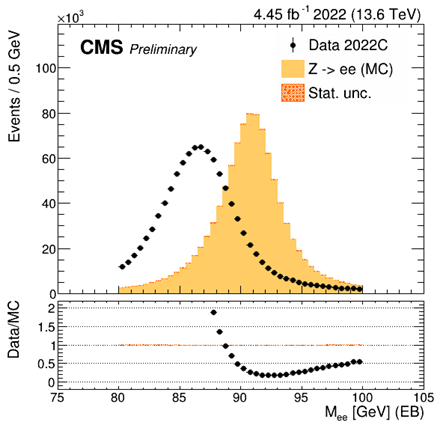

### What went wrong "exactly" is a topic for some other day, but one can say some kind of calibration went "wrong" and was eventually fixed with input of ECAL experts.



# Energy Regression

### Even after all the fancy correction, so final regression is still needed.

The energy resolution of the detector, defined as the width of the energy distribution for a given particle, plays a vital role in the precision of physics measurements. 

By applying energy regression techniques, it is possible to improve the energy resolution for electrons and photons, enhancing the ability to resolve subtle energy differences between particles and reconstruct their properties more accurately.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from Tools.Regression_ex import gen_data_nice, gen_data_exp

## Generate some electrons with a uniform true energy distribution, then pass them through the detector and measure their energy.

In [13]:
energy_true,energy_measured=gen_data_nice()

In [ ]:
%matplotlib inline

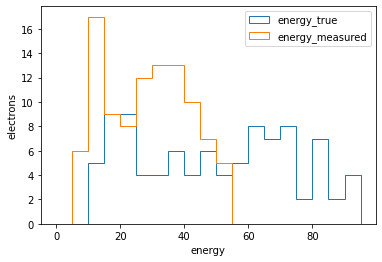

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting histograms
plt.hist(energy_true, bins=np.arange(0, 100, 5), label='energy_true',histtype='step')  
plt.hist(energy_measured, bins=np.arange(0, 100, 5), label='energy_measured',histtype='step')

# Add labels and a legend
plt.xlabel('energy')
plt.ylabel('electrons')
plt.legend()

# Show the plot
plt.show()


# The measured energy has a scale shift and also worse resolution

#### This is ofcourse simulation, so we know the true energy.
#### We can design regression to bring back the measured energy as close as possible to it's true energy

## Define the regression function

### Assumption : energy_measured = slope * energy_true  + intercept

In [31]:
def regression_function(energy, slope, intercept):
    return slope * energy + intercept

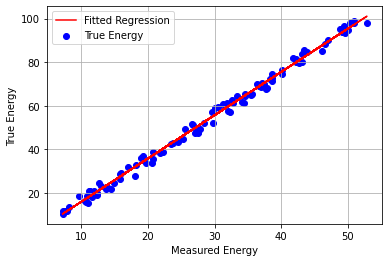

In [32]:
# Perform the regression
params, cov = curve_fit(regression_function, energy_measured, energy_true)

# Extract the fitted parameters
slope_fit, intercept_fit = params

# Generate predictions using the fitted parameters
energy_predicted = regression_function(energy_measured, slope_fit, intercept_fit)

# Plot the results
plt.scatter(energy_measured, energy_true, color='blue', label='True Energy')
plt.plot(energy_measured, energy_predicted, color='red', label='Fitted Regression')
plt.xlabel('Measured Energy')
plt.ylabel('True Energy')
plt.legend()
plt.grid()
plt.show()

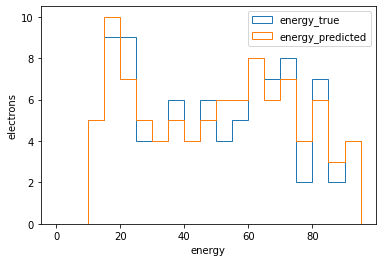

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting histograms
plt.hist(energy_true, bins=np.arange(0, 100, 5), label='energy_true',histtype='step')  
plt.hist(energy_predicted, bins=np.arange(0, 100, 5), label='energy_predicted',histtype='step')

# Add labels and a legend
plt.xlabel('energy')
plt.ylabel('electrons')
plt.legend()

# Show the plot
plt.show()


### Run again, but try using gen_data_exp next time. 
Does the regression work?

What do you think is the issue here? 

Answer: Maybe the same response function will not work, also regression might have to performed differently for different energies, which is usually the case. The regression may also depend on other factors aside from just measured energy.


More on actual regression and correction techniques in CMS:

### Introduction to egamma energy regression
https://indico.cern.ch/event/1259025/#48-introduction-to-egamma-ener

### Introduction to residual scale and smearing corrections
https://indico.cern.ch/event/1259025/#49-introduction-to-residual-sc

# Identification

### Everything that is reconstructed as electrons and photons, are not actually "prompt" electrons and photons
### Even other kinds of signatures can fake electrons and photons
<img src="Pics/FEYNMAN.png" alt="Alt Text" width="800"> 

<img src="Pics/ID.PNG" alt="Alt Text" width="800">

### More on this in the next exercise.